# Model comparisan

In [2]:
# Importing the training and testing sets from the KNN file
import pickle

# Load the data from the file
with open('data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [3]:


from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



In [4]:


# GridSearchCV KNN model
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

knn = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)



In [5]:


# GridSearchCV DTC model
from sklearn.model_selection import GridSearchCV
params =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid= params)



In [6]:


# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=41)



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [8]:


models = [knn, dtc, rfc]
model_names = ["KNN with GridSearchCV", "DTC with GridSearchCV", "RandomForestClassifier"]
colors = ["green", "blue", "red"]



# Cheap/Affordable

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.816 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.815 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.804 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.804 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.803 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.807 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.828 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.826 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.830 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.808 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.822 total time=   0.0s
[CV 6/6] END n_neigh

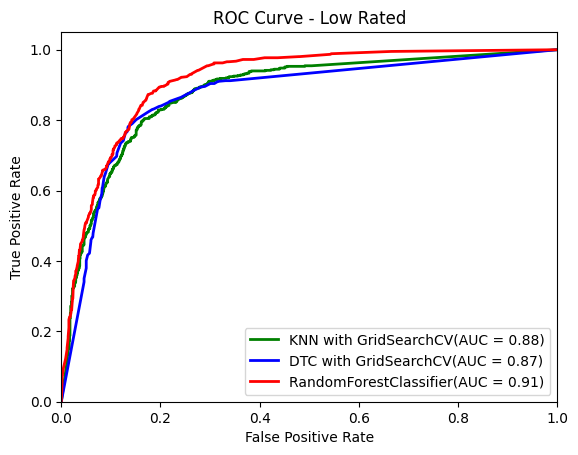

In [9]:
# Choose Low-rated as the positive class
pos_class = "Cheap/Affordable" 

# Combine the other two classes into a single negative class
neg_class = ["Medium priced", "Expensive"]

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Low Rated')
plt.legend(loc="lower right")
plt.show()

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.677 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.698 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.679 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.694 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.669 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.692 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.702 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.701 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.692 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.699 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.686 total time=   0.0s
[CV 6/6] END n_neigh

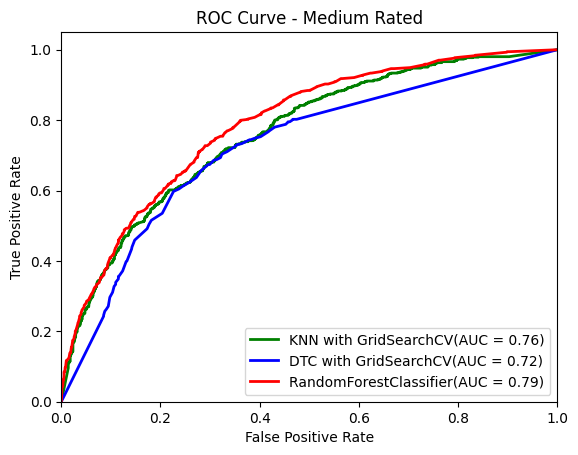

In [10]:
# Choose Medium-rated as the positive class
pos_class = "Medium priced" 
# Combine the other two classes into a single negative class
neg_class = ["Cheap/Affordable", "Expensive"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Medium Rated')
plt.legend(loc="lower right")
plt.show()

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.810 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.826 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.830 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.826 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.790 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.821 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.835 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.834 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.844 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.825 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.806 total time=   0.0s
[CV 6/6] END n_neigh

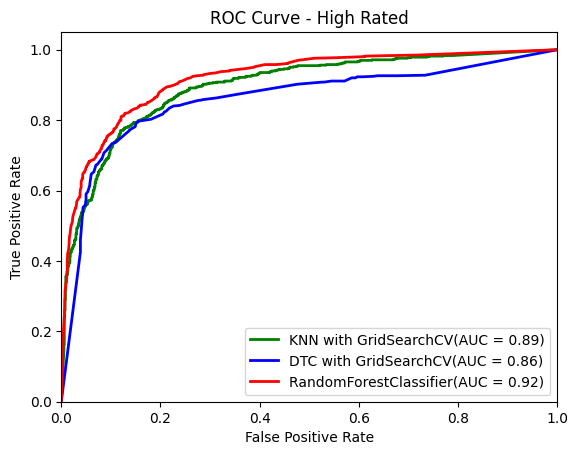

In [11]:
# Choose High-rated as the positive class
pos_class = "Expensive" 
# Combine the other two classes into a single negative class
neg_class = ["Medium priced", "Cheap/Affordable"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Rated')
plt.legend(loc="lower right")
plt.show()